In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Downloads/WknaT6YxR02YeXYuMDPg_water_quality.csv')

In [6]:
df.head()

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


In [7]:
drop_columns = ['Well_ID', 'State', 'District', 'Block', 'Village', 'Latitude', 'Longitude', 'Year']
df.drop(columns=drop_columns, inplace=True)

In [8]:
df.head()

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,8.20,16640.0,0.0,1257.0,5176.0,822.0,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,8.44,299.0,43.0,87.0,21.0,0.0,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,7.90,1315.0,0.0,518.7,120.5,61.6,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,7.40,715.0,0.0,354.0,50.0,18.0,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,8.40,270.0,43.0,87.0,14.0,0.0,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


In [10]:
df.isnull().sum()

pH                              0
EC                              0
CO3                             0
HCO3                            0
Cl                              0
SO4                             0
NO3                             0
TH                              0
Ca                              0
Mg                              0
Na                              0
K                               0
F                               0
TDS                             0
WQI                             0
Water Quality Classification    0
dtype: int64

In [13]:
label_encoder = LabelEncoder()
df['Water Quality Classification'] = label_encoder.fit_transform(df['Water Quality Classification'])

In [16]:
X_reg = df.drop(columns=['WQI', 'Water Quality Classification'])
y_reg = df['WQI']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [17]:
X_cls = df.drop(columns=['WQI', 'Water Quality Classification'])
y_cls = df['Water Quality Classification']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_cls = scaler.fit_transform(X_train_cls)
X_test_cls = scaler.transform(X_test_cls)

In [19]:
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_reg.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_reg.fit(X_train_reg, y_train_reg, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

C:\Users\vicky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 129410.4141 - mae: 228.1694 - val_loss: 5695.8540 - val_mae: 51.4717
Epoch 2/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5216.2676 - mae: 45.8561 - val_loss: 1484.7065 - val_mae: 21.8524
Epoch 3/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2450.0691 - mae: 28.4599 - val_loss: 957.5268 - val_mae: 15.6841
Epoch 4/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1927.5526 - mae: 23.1264 - val_loss: 625.7894 - val_mae: 11.3363
Epoch 5/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1755.2830 - mae: 21.6155 - val_loss: 524.7761 - val_mae: 9.8739
Epoch 6/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1440.8242 - mae: 19.6423 - val_loss: 399.1824 - val_mae: 7.8566
Epoch 7/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1231.3962 - mae: 19.1229 - val_loss: 343.8443 - val_mae: 8.2501
Epoch 8/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1152.8384 - mae: 18.8972 - val_loss: 398.7713 - val_ma

In [20]:
y_pred_reg = model_reg.predict(X_test_reg).flatten()
r2 = r2_score(y_test_reg, y_pred_reg)
print(f'Regression Model R² Score: {r2:.4f}')

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 
Regression Model R² Score: 0.9997


In [21]:
model_cls = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_cls.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])
model_cls.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cls.fit(X_train_cls, y_train_cls, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

C:\Users\vicky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6737 - loss: 0.9051 - val_accuracy: 0.8880 - val_loss: 0.2865
Epoch 2/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8746 - loss: 0.3038 - val_accuracy: 0.9323 - val_loss: 0.1887
Epoch 3/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9096 - loss: 0.2217 - val_accuracy: 0.9448 - val_loss: 0.1498
Epoch 4/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9227 - loss: 0.1866 - val_accuracy: 0.9563 - val_loss: 0.1237
Epoch 5/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9371 - loss: 0.1595 - val_accuracy: 0.9547 - val_loss: 0.1151
Epoch 6/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9400 - loss: 0.1416 - val_accuracy: 0.9655 - val_loss: 0.1024
Epoch 7/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9487 - loss: 0.1289 - val_accuracy: 0.9688 - val_loss: 0.0888
Epoch 8/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9478 - loss: 0.1207 - val_accu

In [22]:
y_pred_cls = model_cls.predict(X_test_cls)
y_pred_cls = np.argmax(y_pred_cls, axis=1)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
print(f'Classification Model Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 
Classification Model Accuracy: 0.9840, F1 Score: 0.9840


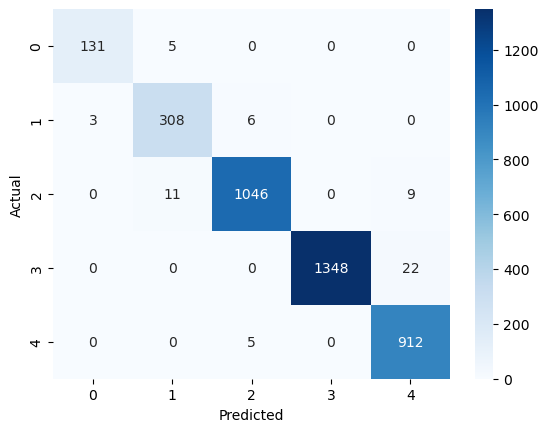

In [23]:
cm = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()